#### Code for data wrangling. 

##### Here we will obtain the data from the SVHN Dataset and the Celeb A dataset

## SVHN Dataset

In [1]:
import data_wrangle

In [3]:
from scipy.io import loadmat # Library to get mat files from SVHN Dataset
import matplotlib.image as img # Get images and make them matrices from Celeb A
from matplotlib import pyplot as plt # Plot images
from os import listdir # Get jpg images from Celeb A
from os.path import isfile, join # Just to get structure of files
import numpy as np
from tempfile import TemporaryFile # To save matrix of images
import random

In [ ]:
svhn_test = loadmat('SVHN/test_32X32.mat') # SVHN test set
svhn_testx = svhn_test['X'] # test images
svhn_testy = svhn_test['y'] # test labels
svhn_train = loadmat('SVHN/train_32X32.mat') # SVHN train set
svhn_trainx = svhn_train['X'] # train images
svhn_trainy = svhn_train['y'] # train labels

## Celeb A

In [ ]:
path = 'Celeb_A/Images'
files = [f for f in listdir(path) if isfile(join(path, f))] # Getting every image in the folder

In [11]:
celeb_y = []
for file in files: # Making it a matrix with values instead of png
    celeb_y.append(img.imread(path+'/'+file))

In [364]:
# So we don't have to run all for tests, we will use 2 images.
celeb_aux = []
aux = img.imread(path+'/'+files[4]) 
aux2 = img.imread(path+'/'+files[5]) 
celeb_aux.append(aux)
celeb_aux.append(aux2)

In [365]:
def show(image): # func to plot image
    plt.imshow(image)
    plt.show()
    return None

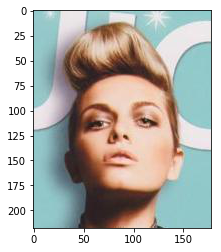

In [366]:
show(celeb_aux[0])

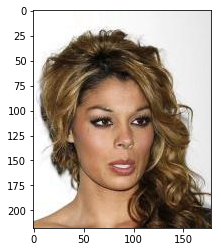

In [367]:
show(celeb_aux[1])

In [368]:
def cut(images): # cropping images
    images_cr = []
    for image in images:
        images_cr.append(image[45:173,25:153,:])
                            # [77:141,57:121,:] for 64 X 64
    return images_cr

In [369]:
celeb_cr = cut(celeb_aux)

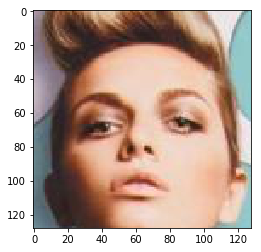

In [370]:
show(celeb_cr[0])

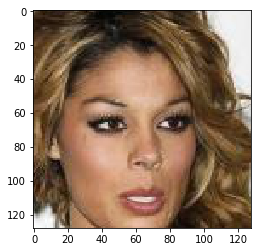

In [416]:
show(celeb_cr[1])

### Making holes in the images

#### Taking out 80%

In [419]:
def delete_pixels(pics, portion):

    images = np.copy(pics)
    mask = np.ones(images.shape)
    out = []
    im = 0
    for image in images: # For every image
        image.setflags(write=1)
        for i in range(0,len(images[0])):
            for j in range(0,len(images[0][0])): # For every pixel
                p = random.uniform(0,1) # Random p
                if p > 1 - portion: # Probability of getting noise is the portion.
                    image[i,j] = [0]*3 # Delete the pixel
                    mask[im][i,j] = 0
        out.append(image) # Get array of new images
        im += 1
        
    return np.array(out),mask

In [420]:
with_dpixels,mask = delete_pixels(celeb_cr,0.8)

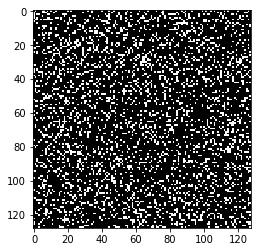

In [421]:
# Just a mask example
show(mask[0])

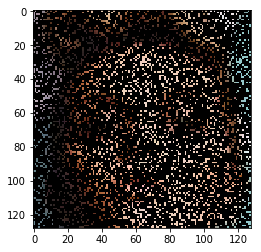

In [422]:
show(with_dpixels[0])

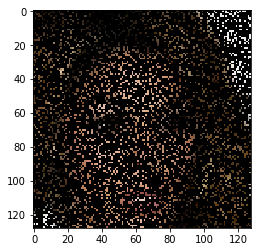

In [423]:
show(with_dpixels[1])

#### Adding black square.

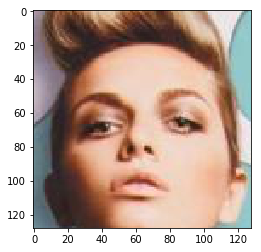

In [424]:
show(celeb_cr[0])

In [457]:
def center_square(pics):
    
    out =[]
    images = np.copy(pics)
    mask = np.ones(images[0].shape)
    dim1 = len(mask)
    dim2 = len(mask[0])
    
    mask[int(dim1/4):int(3*dim1/4),int(dim2/4):int(3*dim2/4),:] = 0
    
    for image in images: # For every image
        image.setflags(write=1)
        for i in range(0,len(images[0])):
            for j in range(0,len(images[0][0])): # For every pixel
                if mask[i,j].any() == 0: # Use the mask to 
                    image[i,j] = [0]*3 # delete the pixel
        out.append(image) # Get array of new images
    
    return np.array(out),mask

In [458]:
out,mask = center_square(celeb_cr)

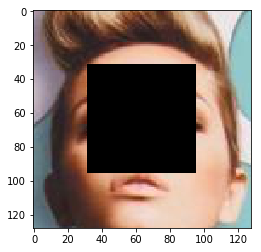

In [459]:
show(out[0])

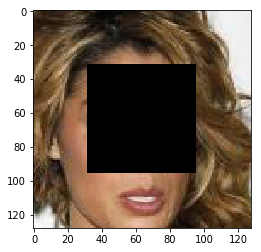

In [460]:
show(out[1])

#### Taking half (left,right,up,down)

In [469]:
def center_square(pics,place):
    
    out =[]
    images = np.copy(pics)
    mask = np.ones(images[0].shape)
    dim1 = len(mask)
    dim2 = len(mask[0])
    
    if place.lower() == 'up':
        mask[:int(dim2/2),:,:] = 0
    elif place.lower() == 'down':
        mask[int(dim2/2):,:,:] = 0
    elif place.lower() == 'right':
        mask[:,int(dim2/2):,:] = 0
    elif place.lower() == 'left':
        mask[:,:int(dim2/2),:] = 0
    else:
        raise ValueError('That makes no sense.')
        
    
    for image in images: # For every image
        image.setflags(write=1)
        for i in range(0,len(images[0])):
            for j in range(0,len(images[0][0])): # For every pixel
                if mask[i,j].any() == 0: # Use the mask to 
                    image[i,j] = [0]*3 # delete the pixel
        out.append(image) # Get array of new images
    
    return np.array(out),mask

In [477]:
out_h,mask = center_square(celeb_cr,'right')

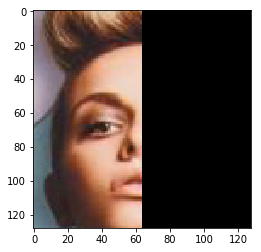

In [475]:
show(out_h[0])